In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LinearRegression #imporiting library for linear regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures


%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


In [84]:
# reading the files
df_crops = pd.read_csv('FAOSTAT_data_4-23-2021Crops.csv')
df_livestock = pd.read_csv('FAOSTAT_data_4-23-2021Livestock.csv')
df_temp = pd.read_csv('GlobalTemperatures.csv')


In [85]:
df_crops

Domain Code Domain  Area Code         Area  Element Code         Element  Item Code                 Item  Year Code  Year   Unit     Value Flag                                   Flag Description
0              QC  Crops          2  Afghanistan          5312  Area harvested       1753  Fibre Crops Primary       1961  1961     ha   76892.0    A  Aggregate, may include official, semi-official...
1              QC  Crops          2  Afghanistan          5312  Area harvested       1753  Fibre Crops Primary       1962  1962     ha   91056.0    A  Aggregate, may include official, semi-official...
2              QC  Crops          2  Afghanistan          5312  Area harvested       1753  Fibre Crops Primary       1963  1963     ha  121408.0    A  Aggregate, may include official, semi-official...
3              QC  Crops          2  Afghanistan          5312  Area harvested       1753  Fibre Crops Primary       1964  1964     ha  121408.0    A  Aggregate, may include official, semi-official...
4              QC  Crops          2  Afghanistan          5312  Area harvested       1753  Fibre Crops Primary       1965  1965     ha   80939.0    A  Aggregate, may include official, semi-official...
...           ...    ...        ...          ...           ...             ...        ...                  ...        ...   ...    ...       ...  ...                                                ...
14042          QC  Crops       5000        World          5419           Yield       1753  Fibre Crops Primary       2015  2015  hg/ha    1516.0   Fc                                    Calculated data
14043          QC  Crops       5000        World          5419           Yield       1753  Fibre Crops Primary       2016  2016  hg/ha    1587.0   Fc                                    Calculated data
14044          QC  Crops       5000        World          5419           Yield       1753  Fibre Crops Primary       2017  2017  hg/ha    1400.0   Fc                                    Calculated data
14045          QC  Crops       5000        World          5419           Yield       1753  Fibre Crops Primary       2018  2018  hg/ha    1544.0   Fc                                    Calculated data
14046          QC  Crops       5000        World          5419           Yield       1753  Fibre Crops Primary       2019  2019  hg/ha    1345.0   Fc                                    Calculated data

[14047 rows x 14 columns]

In [86]:
#Cleaning the data
# Dropped two Polynesia and Melanesia due to lack of data

df_crops['Area'].unique()
df_crops.drop(df_crops.index[df_crops['Area'] == 'Polynesia'], inplace = True)
df_crops.drop(df_crops.index[df_crops['Area'] == 'Melanesia'], inplace = True)
df_crops_cleaned = df_crops.dropna()
#df_crops_cleaned.isnull().values.sum()
df_crops_cleaned = df_crops_cleaned[df_crops_cleaned['Element'] == 'Yield']
# df_crops_cleaned['Area'].unique()

# Year and Yield (hg/ha)

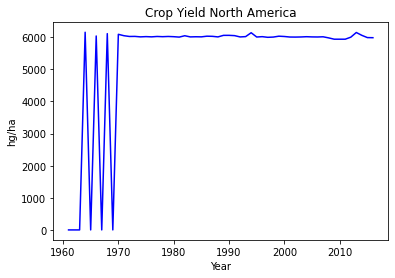

In [87]:
#North America Crops
NA_Crops = df_crops_cleaned[ (df_crops_cleaned.Area == 'Canada') | (df_crops_cleaned.Area == 'United States of America') ]
NA_Crops = NA_Crops[NA_Crops.Year < 2017]
NA_Crops = NA_Crops[(NA_Crops.Element == 'Yield')]
NA_Crops = NA_Crops.groupby('Year Code')['Value'].mean()
NA_Crops.shape
NA_Crops.plot(xlabel = 'Year', ylabel = 'hg/ha',x= 'Year Code', y = 'Value', kind = 'line',color = 'blue')
plt.title('Crop Yield North America')
plt.show()



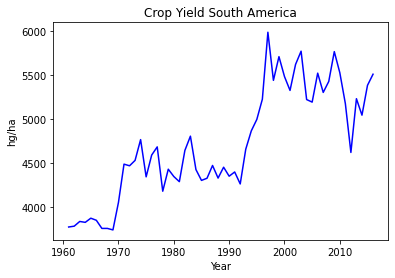

In [88]:
#South America
SA_Crops = df_crops_cleaned[ (df_crops_cleaned.Area == 'Colombia') | (df_crops_cleaned.Area == 'Brazil')| (df_crops_cleaned.Area == 'Chile') ]
#SA_Crops = SA_Crops.groupby('Year Code')['Value'].mean()
#SA_Crops

SA_Crops = SA_Crops[SA_Crops.Year < 2017]
SA_Crops = SA_Crops[(SA_Crops.Element == 'Yield')]
SA_Crops = SA_Crops.groupby('Year Code')['Value'].mean()
SA_Crops.shape
SA_Crops.plot(xlabel = 'Year', ylabel = 'hg/ha',x= 'Year Code', y = 'Value', kind = 'line',color = 'blue')
plt.title('Crop Yield South America')
plt.show()


In [89]:
#Asia
AS_Crops = df_crops_cleaned[ (df_crops_cleaned.Area == 'India') | (df_crops_cleaned.Area == 'China')| (df_crops_cleaned.Area == 'Syria') ]
#AS_Crops = AS_Crops.groupby('Year Code')['Value'].mean()
#AS_Crops

AS_Crops = AS_Crops[AS_Crops.Year < 2017]
AS_Crops = AS_Crops[(AS_Crops.Element == 'Yield')]
AS_Crops = AS_Crops.groupby('Year Code')['Value'].mean()
AS_Crops.shape
AS_Crops.plot(xlabel = 'Year', ylabel = 'hg/ha',x= 'Year Code', y = 'Value', kind = 'line',color = 'blue')
plt.title('Crop Yield Asia')
plt.show()

In [90]:
#AFRICA DATA 
AF_Crops = df_crops_cleaned[ (df_crops_cleaned.Area == 'Ethiopia') | (df_crops_cleaned.Area == 'Nigeria') | (df_crops_cleaned.Area == 'South Africa')]

AF_Crops = AF_Crops[AF_Crops.Year < 2017]
AF_Crops = AF_Crops[(AF_Crops.Element == 'Yield')]
AF_Crops = AF_Crops.groupby('Year Code')['Value'].mean()
AF_Crops.plot(xlabel = 'Year', ylabel = 'hg/ha',x= 'Year Code', y = 'Value', kind = 'line',color = 'blue')
plt.title('Crop Yield Africa')
plt.show()

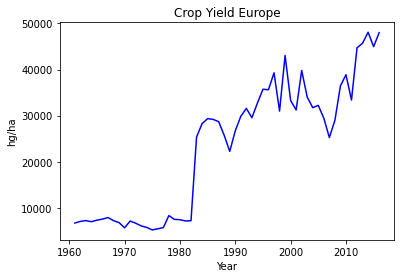

In [91]:
#Europe data
EU_Crops = df_crops_cleaned[ (df_crops_cleaned.Area == 'Italy')  | (df_crops_cleaned.Area == 'Romania') | (df_crops_cleaned.Area == 'Netherlands')]
EU_Crops = EU_Crops[EU_Crops.Year < 2017]
EU_Crops = EU_Crops[(EU_Crops.Element == 'Yield')]
EU_Crops = EU_Crops.groupby('Year Code')['Value'].mean()
EU_Crops.plot(xlabel = 'Year', ylabel = 'hg/ha',x= 'Year Code', y = 'Value', kind = 'line',color = 'blue')
plt.title('Crop Yield Europe')
plt.show()



In [92]:
OC_Crops = df_crops_cleaned[ (df_crops_cleaned.Area == 'Australia') | (df_crops_cleaned.Area == 'New Zealand') ]
OC_Crops = OC_Crops[OC_Crops.Year < 2017]
OC_Crops = OC_Crops[(OC_Crops.Element == 'Yield')]
OC_Crops = OC_Crops.groupby('Year Code')['Value'].mean()
OC_Crops.plot(xlabel = 'Year', ylabel = 'hg/ha',x= 'Year Code', y = 'Value', kind = 'line',color = 'blue')
plt.title('Crop Yield Oceania')
plt.show()

In [93]:
# Dropped two Polynesia and Melanesia due to lack of data
# Dropping NaN values from the dataframe
#df_livestock
df_livestock.drop(df_livestock.index[df_livestock['Area'] == 'Polynesia'], inplace = True)
df_livestock.drop(df_livestock.index[df_livestock['Area'] == 'Melanesia'], inplace = True)
# Dropping NaN values from the dataframe
df_livestock_cleaned = df_livestock.dropna()

#df_livestock_cleaned.isnull().values.sum()
#df_livestock_cleaned['Area'].unique()
#df_livestock_cleaned


## We chose our countries based on population and land area
### North America countries: Canada and USA
### South America: Brazil, Colombia, and Chile
### Asia: China, India, and Syria
### Africa: Nigeria, Ethiopia, and South Africa
### Europe: Romania, Italy Netherlands
### Oceania: Australia and New Zealand

In [94]:
# NORTH AMERICA
df_northAmerica = df_livestock_cleaned[ (df_livestock_cleaned.Area == 'United States of America') | (df_livestock_cleaned.Area == 'Canada') ]
df_northAmerica = df_northAmerica[df_northAmerica.Year < 2017]
#df_northAmerica

## Livestock production has been steadily increasing from 1961 to 2020

In [95]:
df2_northAmerica = df_northAmerica[(df_northAmerica.Element == 'Production')]
dfg_NA = df2_northAmerica.groupby('Year Code')['Value'].mean()
dfg_NA.plot(xlabel = 'Year', ylabel = 'Tonnes',x= 'Year Code', y = 'Value', kind = 'line',color = 'purple')
plt.title('Livestock Production North America')
plt.show()


In [96]:
dfg_NA.shape

(56,)

In [97]:
# SOUTH AMERICA
df_southAmerica = df_livestock_cleaned[ (df_livestock_cleaned.Area == 'Brazil') | (df_livestock_cleaned.Area == 'Colombia') | (df_livestock_cleaned.Area == 'Chile') ]
df_southAmerica = df_southAmerica[df_southAmerica.Year < 2017]
df2_SA = df_southAmerica[(df_southAmerica.Element == 'Production')]

dfg_SA = df2_SA.groupby('Year Code')['Value'].mean()
dfg_SA.plot(xlabel = 'Year', ylabel = 'Tonnes',x= 'Year Code', y = 'Value', kind = 'line',color = 'purple')
plt.title('Livestock Production South America')
plt.show()


In [98]:
dfg_SA.shape

(56,)

In [99]:
#AFRICA
df_africa = df_livestock_cleaned[ (df_livestock_cleaned.Area == 'Nigeria') | (df_livestock_cleaned.Area == 'Ethiopia') | (df_livestock_cleaned.Area == 'South Africa') ]
df_africa = df_africa[df_africa.Year < 2017]
df2_AF = df_africa[(df_africa.Element == 'Production')]
dfg_AF = df2_AF.groupby('Year Code')['Value'].mean()
dfg_AF.plot(xlabel = 'Year', ylabel = 'Tonnes',x= 'Year Code', y = 'Value', kind = 'line',color = 'purple')
plt.title('Livestock Production Africa')
plt.show()

In [100]:
#ASIA
df_asia = df_livestock_cleaned[ (df_livestock_cleaned.Area == 'China') | (df_livestock_cleaned.Area == 'India') | (df_livestock_cleaned.Area == 'Syria') ]
df_asia = df_asia[df_asia.Year < 2017]
df2_AS = df_asia[(df_asia.Element == 'Production')]
dfg_AS = df2_AS.groupby('Year Code')['Value'].mean()
dfg_AS.plot(xlabel = 'Year', ylabel = 'Tonnes',x= 'Year Code', y = 'Value', kind = 'line',color = 'purple')
plt.title('Livestock Production Asia')
plt.show()

# Livestock production in Europe was increasing from the year 1960 to 1990. It went down after that year.

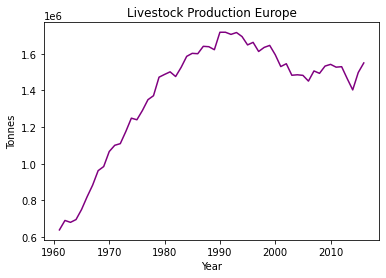

In [101]:
#Europe
df_europe= df_livestock_cleaned[ (df_livestock_cleaned.Area == 'Netherlands') | (df_livestock_cleaned.Area == 'Italy') | (df_livestock_cleaned.Area == 'Romania') ]
df_europe = df_europe[df_europe.Year < 2017]
df2_EU = df_europe[(df_europe.Element == 'Production')]
dfg_EU = df2_EU.groupby('Year Code')['Value'].mean()
dfg_EU.plot(xlabel = 'Year', ylabel = 'Tonnes',x= 'Year Code', y = 'Value', kind = 'line',color = 'purple')
plt.title('Livestock Production Europe')
plt.show()

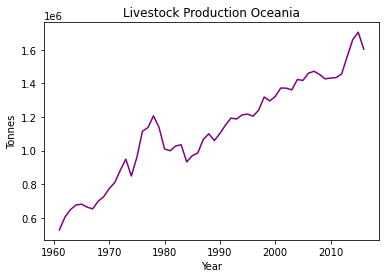

In [102]:
#Oceania
df_oceania= df_livestock_cleaned[ (df_livestock_cleaned.Area == 'Australia') | (df_livestock_cleaned.Area == 'New Zealand') | (df_livestock_cleaned.Area == 'Papua New Guinea')  ]
df_oceania = df_oceania[df_oceania.Year < 2017]
df2_OC = df_oceania[(df_oceania.Element == 'Production')]
dfg_OC = df2_OC.groupby('Year')['Value'].mean()
dfg_OC.plot(xlabel = 'Year', ylabel = 'Tonnes',x= 'Year Code', y = 'Value', kind = 'line',color = 'purple')
plt.title('Livestock Production Oceania')
plt.show()

####TODO: Predictions, Models, Cross validation 

# Temperature data per continents...

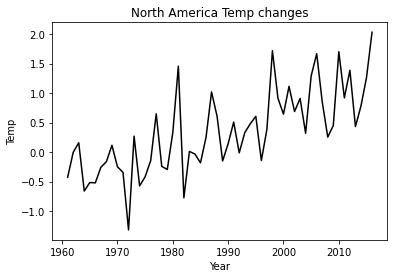

In [103]:
#Reading data for north america
df_NA1 = pd.read_csv('tas_1901_2016_CAN.csv')
df_NA2 = pd.read_csv('tas_1901_2016_USA.csv')

#This is the combonied tables for North America
df_NA= pd.concat([df_NA1, df_NA2], axis=0)
df_NA.dropna()

#renaming column
df_NA.columns
df_NA = df_NA.rename(columns={' Year': 'Year'})

#Cleaning data
_df_NA = df_NA[(df_NA.Year > 1960)]
_df_NA
# _df_NA[_df_NA['Year'] == 1961].mean()

#Getting average per year
new_df_NA = _df_NA.groupby('Year')['Temperature - (Celsius)'].mean()
new_df_NA 

#Plotting the data
new_df_NA.plot(xlabel = 'Year', ylabel = 'Temp',x= 'Year', y = 'Temperature - (Celsius)', kind = 'line',color = 'black')
plt.title('North America Temp changes')
plt.show()

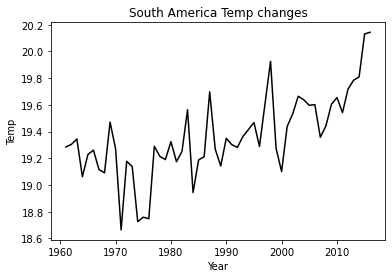

In [104]:
#South America 

#Reading data for north america
df_SA1 = pd.read_csv('tas_1901_2016_BRA.csv')
df_SA2 = pd.read_csv('tas_1901_2016_CHL.csv')
df_SA3 = pd.read_csv('tas_1901_2016_COL.csv')
#This is the combonied tables for North America
df_SA= pd.concat([df_SA1, df_SA2, df_SA3], axis=0)
df_SA.dropna()

#renaming column
df_SA.columns
df_SA = df_SA.rename(columns={' Year': 'Year'})

#Cleaning data
_df_SA = df_SA[(df_SA.Year > 1960)]
_df_SA

#Getting average per year
new_df_SA = _df_SA.groupby('Year')['Temperature - (Celsius)'].mean()
new_df_SA 

#Plotting the data
new_df_SA.plot(xlabel = 'Year', ylabel = 'Temp',x= 'Year', y = 'Temperature - (Celsius)', kind = 'line',color = 'black')
plt.title('South America Temp changes')
plt.show()

In [105]:
#Europe
df_EU1 = pd.read_csv('tas_1901_2016_NLD.csv')
df_EU2 = pd.read_csv('tas_1901_2016_ITA.csv')
df_EU3 = pd.read_csv('tas_1901_2016_ROU.csv')

#This is the combined tables for North America
df_EU= pd.concat([df_EU1, df_EU2, df_EU3], axis=0)
df_EU.dropna()

#renaming column
df_EU.columns
df_EU = df_EU.rename(columns={' Year': 'Year'})

#Cleaning data
_df_EU = df_EU[(df_EU.Year > 1960)]
_df_EU
# _df_NA[_df_NA['Year'] == 1961].mean()

#Getting average per year
new_df_EU = _df_EU.groupby('Year')['Temperature - (Celsius)'].mean()
new_df_EU 

#Plotting the data
new_df_EU.plot(xlabel = 'Year', ylabel = 'Temp',x= 'Year', y = 'Temperature - (Celsius)', kind = 'line',color = 'black')
plt.title('Europe Temp changes')
plt.show()


In [106]:
#Asia
df_AS1 = pd.read_csv('tas_1901_2016_CHN.csv')
df_AS2 = pd.read_csv('tas_1901_2016_IND.csv')
df_AS3 = pd.read_csv('tas_1901_2016_SYR.csv')

#This is the combonied tables for North America
df_AS= pd.concat([df_AS1, df_AS2, df_AS3], axis=0)
df_AS.dropna()

#renaming column
df_AS.columns
df_AS = df_AS.rename(columns={' Year': 'Year'})

#Cleaning data
_df_AS = df_AS[(df_AS.Year > 1960)]
_df_AS


#Getting average per year
new_df_AS = _df_AS.groupby('Year')['Temperature - (Celsius)'].mean()
new_df_AS 

#Plotting the data
new_df_AS.plot(xlabel = 'Year', ylabel = 'Temp',x= 'Year', y = 'Temperature - (Celsius)', kind = 'line',color = 'black')
plt.title('Asia Temp changes')
plt.show()

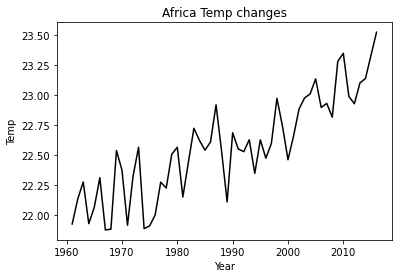

In [107]:
#Africa
#Reading data for Africa
df_AF1 = pd.read_csv('tas_1901_2016_ETH.csv')
df_AF2 = pd.read_csv('tas_1901_2016_NGA.csv')
df_AF3 = pd.read_csv('tas_1901_2016_ZAF.csv')

#This is the combonied tables for North America
df_AF= pd.concat([df_AF1, df_AF2, df_AF3], axis=0)
df_AF.dropna()

#renaming column
df_AF.columns
df_AF = df_AF.rename(columns={' Year': 'Year'})

#Cleaning data
_df_AF = df_AF[(df_AF.Year > 1960)]
_df_AF
# _df_NA[_df_NA['Year'] == 1961].mean()

#Getting average per year
new_df_AF = _df_AF.groupby('Year')['Temperature - (Celsius)'].mean()
new_df_AF 

#Plotting the data
new_df_AF.plot(xlabel = 'Year', ylabel = 'Temp',x= 'Year', y = 'Temperature - (Celsius)', kind = 'line',color = 'black')
plt.title('Africa Temp changes')
plt.show()

In [108]:
#Oceania
#Reading data for Oceania
df_OC1 = pd.read_csv('tas_1901_2016_AUS.csv')
df_OC2 = pd.read_csv('tas_1901_2016_NZL.csv')

#This is the combonied tables for North America
df_OC= pd.concat([df_OC1, df_OC2], axis=0)
df_OC.dropna()

#renaming column
df_OC.columns
df_OC = df_OC.rename(columns={' Year': 'Year'})

#Cleaning data
_df_OC = df_OC[(df_OC.Year > 1960)]
_df_OC
# _df_NA[_df_NA['Year'] == 1961].mean()

#Getting average per year
new_df_OC = _df_OC.groupby('Year')['Temperature - (Celsius)'].mean()
new_df_OC 

#Plotting the data
new_df_OC.plot(xlabel = 'Year', ylabel = 'Temp',x= 'Year', y = 'Temperature - (Celsius)', kind = 'line',color = 'black')
plt.title('Oceania Temp changes')
plt.show()

# Predictions using linear regression


In [109]:
#CONVERTING ALL DATA INTO numpy Arrays

#North America
new_df_NA = new_df_NA.to_numpy()
new_df_NA = new_df_NA[:,np.newaxis]
dfg_NA = dfg_NA.to_numpy()

#South America
new_df_SA = new_df_SA.to_numpy()
new_df_SA = new_df_SA[:,np.newaxis]
dfg_SA = dfg_SA.to_numpy()

#Europe
new_df_EU = new_df_EU.to_numpy()
new_df_EU = new_df_EU[:,np.newaxis]
dfg_EU = dfg_EU.to_numpy()

#Africa
new_df_AF = new_df_AF.to_numpy()
new_df_AF = new_df_AF[:,np.newaxis]
dfg_AF = dfg_AF.to_numpy()

#Asia
new_df_AS = new_df_AS.to_numpy()
new_df_AS = new_df_AS[:,np.newaxis]
dfg_AS = dfg_AS.to_numpy()

#Oceania
new_df_OC = new_df_OC.to_numpy()
new_df_OC = new_df_OC[:,np.newaxis]
dfg_OC = dfg_OC.to_numpy()

In [110]:
######################## NORTH AMERICA ###################################
#create model
model = LinearRegression()
scaler = StandardScaler()

# new_df_NA = new_df_NA.to_numpy()
# new_df_NA = new_df_NA[:,np.newaxis]
# new_df_NA.shape

# dfg_NA = dfg_NA.to_numpy()



In [127]:
#######


# Linear Regression 

#new_df_SA.reshape(1,-1)


new_df_NA_1 = scaler.fit_transform(new_df_NA)
new_df_EU_1 = scaler.fit_transform(new_df_EU)
new_df_AF_1 = scaler.fit_transform(new_df_AF)
new_df_SA_1 = scaler.fit_transform(new_df_AS)
new_df_OC_1 = scaler.fit_transform(new_df_OC)

NA_Crops = NA_Crops.to_numpy()
EU_Crops = EU_Crops.to_numpy()
AF_Crops = AF_Crops.to_numpy()
OC_Crops = OC_Crops.to_numpy()
AS_Crops = AS_Crops.to_numpy()

new_df_NA_Crops_1 = scaler.fit_transform(NA_Crops.reshape(-1,1))
new_df_EU_Crops_1 = scaler.fit_transform(EU_Crops.reshape(-1,1))
new_df_AF_Crops_1 = scaler.fit_transform(AF_Crops.reshape(-1,1))
new_df_OC_Crops_1 = scaler.fit_transform(OC_Crops.reshape(-1,1))
new_df_SA_Crops_1 = scaler.fit_transform(AS_Crops.reshape(-1,1))

new_df_EU_Crops_1 = scaler.fit_transform(new_df_EU)
new_df_AF_Crops_1 = scaler.fit_transform(new_df_AF)
new_df_SA_Crops_1 = scaler.fit_transform(new_df_AS)
new_df_OC_Crops_1 = scaler.fit_transform(new_df_OC)

#print(new_df_EU_1.shape)
#print(new_df_EU.shape)
#new_df_EU_1.reshape(1,-1)
#new_df_NA_1 = scaler.fit_transform(new_df_NA)


AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

# This tells us what the best degree to use for the polynomial regression using cross-validation

In [128]:
rmses = []
degrees = np.arange(1, 10)
min_rmse, min_degNA = 1e10, 0

NA_X1_train,NA_X_test , NA_y1_train, NA_y_test = train_test_split(new_df_NA_1, dfg_NA, test_size = 0.15 )

for deg in degrees:

    # Train features
    poly_features = PolynomialFeatures(degree=deg, include_bias=False)
    x_poly_train = poly_features.fit_transform(NA_X1_train)

    # Linear regression
    poly_reg = LinearRegression()
    poly_reg.fit(x_poly_train, NA_y1_train)

    # Compare with test data
    x_poly_test = poly_features.fit_transform(NA_X_test)
    poly_predict = poly_reg.predict(x_poly_test)
    poly_mse = mean_squared_error(NA_y_test, poly_predict)
    poly_rmse = np.sqrt(poly_mse)
    rmses.append(poly_rmse)
    
    # Cross-validation of degree
    if min_rmse > poly_rmse:
        min_rmse = poly_rmse
        min_degNA = deg

#ROOT MEAN SQUARE ERROR
print('Best degree {} with RMSE {}'.format(min_degNA, min_rmse))     

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(degrees, rmses)
ax.set_yscale('log')
ax.set_xlabel('Degree')
ax.set_ylabel('RMSE')

Best degree 6 with RMSE 1887929.17670467


Text(0, 0.5, 'RMSE')

In [129]:
#

# North America

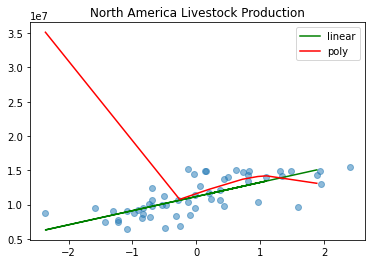

In [130]:
# Linear and polynomial regression

import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


x_train, x_test, y_train, y_test = train_test_split(new_df_NA_1, dfg_NA, test_size=0.15, random_state=0)

poly_model = make_pipeline(PolynomialFeatures(degree=min_degNA), linear_model.LinearRegression())
poly_model.fit(x_train, y_train)

linear_model_1 = linear_model.LinearRegression()
linear_model_1.fit(x_train, y_train)

fig = plt.figure()
ax = plt.axes()

ax.scatter(new_df_NA_1,dfg_NA, alpha=0.5, cmap='viridis')
ax.plot(x_test, linear_model_1.predict(x_test), color='green', label='linear')
x_test.sort(axis=0)
ax.plot(x_test, poly_model.predict(x_test), color='red', label='poly')

plt.title('North America Livestock Production')
plt.xlabel('')
plt.ylabel('')
ax.legend()

In [131]:
print(new_df_SA_1.shape)
print(dfg_SA.shape)

(56, 1)
(56,)


In [132]:
new_df_NA_1 = scaler.fit_transform(dfg_NA.reshape(-1,1))

#splitting data
NA_X1_train,NA_X_test , NA_y1_train, NA_y_test = train_test_split(new_df_NA_1, dfg_NA, test_size = 0.15 )

# print(NA_y1_train.shape)
# print(NA_X1_train.shape)
#fitting data
model.fit(NA_X1_train,NA_y1_train)
NA_pred = model.predict(NA_X_test)

print(new_df_NA_1[:3])
print("----->" ,new_df_NA[:3])

[[-1.73795285]
 [-1.73039662]
 [-1.59770867]]
-----> [[-0.426515  ]
 [-0.00424125]
 [ 0.15783625]]


In [133]:
#print(mean_squared_error(NA_y_test, NA_pred))
# print(mean_squared_error.confusion_matrix(NA_y_test, NA_pred))

#plt.scatter(NA_X_test, NA_y_test,  color='red')
#plt.plot(NA_X_test, NA_pred, color='blue', linewidth=2)

#plt.xticks(())
#plt.yticks(())

#plt.show()

# Europe live stock 

In [134]:
rmses = []
degrees = np.arange(1, 10)
min_rmse, min_degEU = 1e10, 0

x_train, x_test, y_train, y_test = train_test_split(new_df_EU_1, dfg_EU, test_size=0.15, random_state=0)

for deg in degrees:

    # Train features
    poly_features = PolynomialFeatures(degree=deg, include_bias=False)
    x_poly_train = poly_features.fit_transform(x_train)

    # Linear regression
    poly_reg = LinearRegression()
    poly_reg.fit(x_poly_train, y_train)

    # Compare with test data
    x_poly_test = poly_features.fit_transform(x_test)
    poly_predict = poly_reg.predict(x_poly_test)
    poly_mse = mean_squared_error(y_test, poly_predict)
    poly_rmse = np.sqrt(poly_mse)
    rmses.append(poly_rmse)
    
    # Cross-validation of degree
    if min_rmse > poly_rmse:
        min_rmse = poly_rmse
        min_degSA = deg

#ROOT MEAN SQUARE ERROR
print('Best degree {} with RMSE {}'.format(min_degEU, min_rmse))     

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(degrees, rmses)
ax.set_yscale('log')
ax.set_xlabel('Degree')
ax.set_ylabel('RMSE')

Best degree 0 with RMSE 259327.51293071703


Text(0, 0.5, 'RMSE')

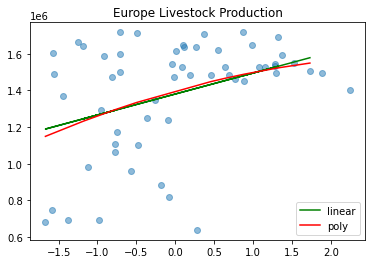

In [135]:



x_train, x_test, y_train, y_test = train_test_split(new_df_EU_1, dfg_EU, test_size=0.15, random_state=0)

poly_model = make_pipeline(PolynomialFeatures(degree=min_degSA), linear_model.LinearRegression())
poly_model.fit(x_train, y_train)

linear_model_1 = linear_model.LinearRegression()
linear_model_1.fit(x_train, y_train)

fig = plt.figure()
ax = plt.axes()

ax.scatter(new_df_EU_1,dfg_EU, alpha=0.5, cmap='viridis')
ax.plot(x_test, linear_model_1.predict(x_test), color='green', label='linear')
x_test.sort(axis=0)
ax.plot(x_test, poly_model.predict(x_test), color='red', label='poly')
plt.title('Europe Livestock Production')
plt.xlabel('')
plt.ylabel('')

ax.legend()

# South America

In [136]:
rmses = []
degrees = np.arange(1, 10)
min_rmse, min_degSA = 1e10, 0

x_train, x_test, y_train, y_test = train_test_split(new_df_SA_1, dfg_SA, test_size=0.15, random_state=0)

for deg in degrees:

    # Train features
    poly_features = PolynomialFeatures(degree=deg, include_bias=False)
    x_poly_train = poly_features.fit_transform(x_train)

    # Linear regression
    poly_reg = LinearRegression()
    poly_reg.fit(x_poly_train, y_train)

    # Compare with test data
    x_poly_test = poly_features.fit_transform(x_test)
    poly_predict = poly_reg.predict(x_poly_test)
    poly_mse = mean_squared_error(y_test, poly_predict)
    poly_rmse = np.sqrt(poly_mse)
    rmses.append(poly_rmse)
    
    # Cross-validation of degree
    if min_rmse > poly_rmse:
        min_rmse = poly_rmse
        min_degSA = deg

#ROOT MEAN SQUARE ERROR
print('Best degree {} with RMSE {}'.format(min_degSA, min_rmse))     

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(degrees, rmses)
ax.set_yscale('log')
ax.set_xlabel('Degree')
ax.set_ylabel('RMSE')

Best degree 2 with RMSE 895112.1859063903


Text(0, 0.5, 'RMSE')

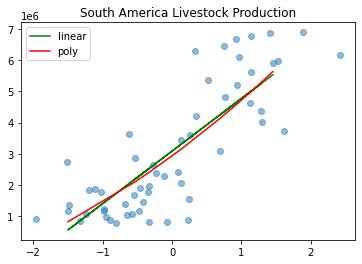

In [137]:
#new_df_EU
#dfg_EU

#dfg_EU_1 = scaler.fit_transform(dfg_EU.reshape(-1,1))
#new_df_NA_1 = scaler.fit_transform(dfg_NA.reshape(-1,1))



x_train, x_test, y_train, y_test = train_test_split(new_df_SA_1, dfg_SA, test_size=0.15, random_state=0)

poly_model = make_pipeline(PolynomialFeatures(degree=min_degSA), linear_model.LinearRegression())
poly_model.fit(x_train, y_train)

linear_model_1 = linear_model.LinearRegression()
linear_model_1.fit(x_train, y_train)

fig = plt.figure()
ax = plt.axes()

ax.scatter(new_df_SA_1,dfg_SA, alpha=0.5, cmap='viridis')
ax.plot(x_test, linear_model_1.predict(x_test), color='green', label='linear')
x_test.sort(axis=0)
ax.plot(x_test, poly_model.predict(x_test), color='red', label='poly')
plt.title('South America Livestock Production')
plt.xlabel('')
plt.ylabel('')

ax.legend()

# AFRICA

Best degree 9 with RMSE 99877.43661090916


Text(0, 0.5, 'RMSE')

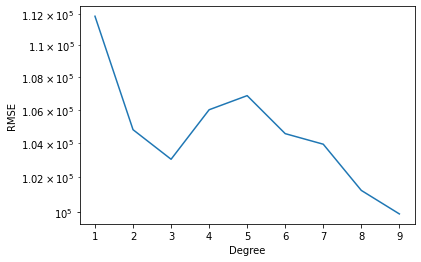

In [138]:
rmses = []
degrees = np.arange(1, 10)
min_rmse, min_degAF = 1e10, 0

x_train, x_test, y_train, y_test = train_test_split(new_df_AF_1, dfg_AF, test_size=0.15, random_state=0)

for deg in degrees:

    # Train features
    poly_features = PolynomialFeatures(degree=deg, include_bias=False)
    x_poly_train = poly_features.fit_transform(x_train)

    # Linear regression
    poly_reg = LinearRegression()
    poly_reg.fit(x_poly_train, y_train)

    # Compare with test data
    x_poly_test = poly_features.fit_transform(x_test)
    poly_predict = poly_reg.predict(x_poly_test)
    poly_mse = mean_squared_error(y_test, poly_predict)
    poly_rmse = np.sqrt(poly_mse)
    rmses.append(poly_rmse)
    
    # Cross-validation of degree
    if min_rmse > poly_rmse:
        min_rmse = poly_rmse
        min_degAF = deg

#ROOT MEAN SQUARE ERROR
print('Best degree {} with RMSE {}'.format(min_degAF, min_rmse))     

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(degrees, rmses)
ax.set_yscale('log')
ax.set_xlabel('Degree')
ax.set_ylabel('RMSE')

In [139]:
x_train, x_test, y_train, y_test = train_test_split(new_df_AF_1, dfg_AF, test_size=0.15, random_state=0)

poly_model = make_pipeline(PolynomialFeatures(degree=min_degAF), linear_model.LinearRegression())
poly_model.fit(x_train, y_train)

linear_model_1 = linear_model.LinearRegression()
linear_model_1.fit(x_train, y_train)

fig = plt.figure()
ax = plt.axes()

ax.scatter(new_df_AF_1,dfg_AF, alpha=0.5, cmap='viridis')
ax.plot(x_test, linear_model_1.predict(x_test), color='green', label='linear')
x_test.sort(axis=0)
ax.plot(x_test, poly_model.predict(x_test), color='red', label='poly')
plt.title('Africa Livestock Production')
plt.xlabel('')
plt.ylabel('')
ax.legend()

# ASIA

Best degree 2 with RMSE 3503740.179506296


Text(0, 0.5, 'RMSE')

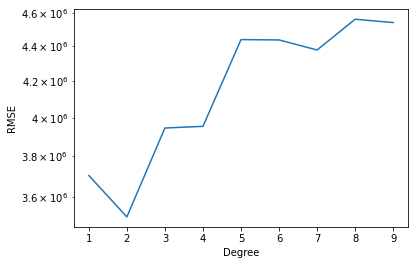

In [140]:
rmses = []
degrees = np.arange(1, 10)
min_rmse, min_degAS = 1e10, 0

x_train, x_test, y_train, y_test = train_test_split(new_df_AS_1, dfg_AS, test_size=0.15, random_state=0)

for deg in degrees:

    # Train features
    poly_features = PolynomialFeatures(degree=deg, include_bias=False)
    x_poly_train = poly_features.fit_transform(x_train)

    # Linear regression
    poly_reg = LinearRegression()
    poly_reg.fit(x_poly_train, y_train)

    # Compare with test data
    x_poly_test = poly_features.fit_transform(x_test)
    poly_predict = poly_reg.predict(x_poly_test)
    poly_mse = mean_squared_error(y_test, poly_predict)
    poly_rmse = np.sqrt(poly_mse)
    rmses.append(poly_rmse)
    
    # Cross-validation of degree
    if min_rmse > poly_rmse:
        min_rmse = poly_rmse
        min_degAS = deg

#ROOT MEAN SQUARE ERROR
print('Best degree {} with RMSE {}'.format(min_degAS, min_rmse))     

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(degrees, rmses)
ax.set_yscale('log')
ax.set_xlabel('Degree')
ax.set_ylabel('RMSE')

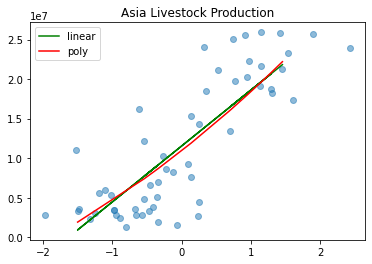

In [141]:
x_train, x_test, y_train, y_test = train_test_split(new_df_AS_1, dfg_AS, test_size=0.15, random_state=0)

poly_model = make_pipeline(PolynomialFeatures(degree=min_degAS), linear_model.LinearRegression())
poly_model.fit(x_train, y_train)

linear_model_1 = linear_model.LinearRegression()
linear_model_1.fit(x_train, y_train)

fig = plt.figure()
ax = plt.axes()

ax.scatter(new_df_AS_1,dfg_AS, alpha=0.5, cmap='viridis')
ax.plot(x_test, linear_model_1.predict(x_test), color='green', label='linear')
x_test.sort(axis=0)
ax.plot(x_test, poly_model.predict(x_test), color='red', label='poly')
plt.title('Asia Livestock Production')
plt.xlabel('')
plt.ylabel('')
ax.legend()

# OCEANIA

In [142]:
rmses = []
degrees = np.arange(1, 10)
min_rmse, min_degOC = 1e10, 0

x_train, x_test, y_train, y_test = train_test_split(new_df_OC_1, dfg_OC, test_size=0.15, random_state=0)

for deg in degrees:

    # Train features
    poly_features = PolynomialFeatures(degree=deg, include_bias=False)
    x_poly_train = poly_features.fit_transform(x_train)

    # Linear regression
    poly_reg = LinearRegression()
    poly_reg.fit(x_poly_train, y_train)

    # Compare with test data
    x_poly_test = poly_features.fit_transform(x_test)
    poly_predict = poly_reg.predict(x_poly_test)
    poly_mse = mean_squared_error(y_test, poly_predict)
    poly_rmse = np.sqrt(poly_mse)
    rmses.append(poly_rmse)
    
    # Cross-validation of degree
    if min_rmse > poly_rmse:
        min_rmse = poly_rmse
        min_degOC = deg

#ROOT MEAN SQUARE ERROR
print('Best degree {} with RMSE {}'.format(min_degOC, min_rmse))     

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(degrees, rmses)
ax.set_yscale('log')
ax.set_xlabel('Degree')
ax.set_ylabel('RMSE')

Best degree 9 with RMSE 254560.6582360177


Text(0, 0.5, 'RMSE')

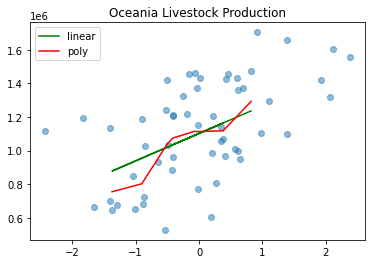

In [143]:
x_train, x_test, y_train, y_test = train_test_split(new_df_OC_1, dfg_OC, test_size=0.15, random_state=0)

poly_model = make_pipeline(PolynomialFeatures(degree=min_degOC), linear_model.LinearRegression())
poly_model.fit(x_train, y_train)

linear_model_1 = linear_model.LinearRegression()
linear_model_1.fit(x_train, y_train)

fig = plt.figure()
ax = plt.axes()

ax.scatter(new_df_OC_1,dfg_OC, alpha=0.5, cmap='viridis')
ax.plot(x_test, linear_model_1.predict(x_test), color='green', label='linear')
x_test.sort(axis=0)
ax.plot(x_test, poly_model.predict(x_test), color='red', label='poly')
plt.title('Oceania Livestock Production')
plt.xlabel('')
plt.ylabel('')
ax.legend()

# NA CROP YIELD LINEAR AND POLYNOMIAL REGRESSION

Best degree 5 with RMSE 1963162.713693241


Text(0, 0.5, 'RMSE')

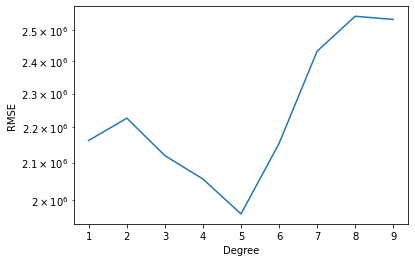

In [144]:
rmses = []
degrees = np.arange(1, 10)
min_rmse, min_degNA_C = 1e10, 0

x_train, x_test, y_train, y_test = train_test_split(new_df_NA_Crops_1, dfg_NA, test_size=0.15, random_state=0)

for deg in degrees:

    # Train features
    poly_features = PolynomialFeatures(degree=deg, include_bias=False)
    x_poly_train = poly_features.fit_transform(x_train)

    # Linear regression
    poly_reg = LinearRegression()
    poly_reg.fit(x_poly_train, y_train)

    # Compare with test data
    x_poly_test = poly_features.fit_transform(x_test)
    poly_predict = poly_reg.predict(x_poly_test)
    poly_mse = mean_squared_error(y_test, poly_predict)
    poly_rmse = np.sqrt(poly_mse)
    rmses.append(poly_rmse)
    
    # Cross-validation of degree
    if min_rmse > poly_rmse:
        min_rmse = poly_rmse
        min_degNA_C = deg

#ROOT MEAN SQUARE ERROR
print('Best degree {} with RMSE {}'.format(min_degNA_C, min_rmse))     

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(degrees, rmses)
ax.set_yscale('log')
ax.set_xlabel('Degree')
ax.set_ylabel('RMSE')

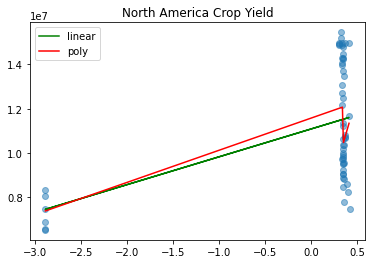

In [145]:
x_train, x_test, y_train, y_test = train_test_split(new_df_NA_Crops_1, dfg_NA, test_size=0.15, random_state=0)

poly_model = make_pipeline(PolynomialFeatures(degree=min_degNA_C), linear_model.LinearRegression())
poly_model.fit(x_train, y_train)

linear_model_1 = linear_model.LinearRegression()
linear_model_1.fit(x_train, y_train)

fig = plt.figure()
ax = plt.axes()

ax.scatter(new_df_NA_Crops_1,dfg_NA, alpha=0.5, cmap='viridis')
ax.plot(x_test, linear_model_1.predict(x_test), color='green', label='linear')
x_test.sort(axis=0)
ax.plot(x_test, poly_model.predict(x_test), color='red', label='poly')

plt.title('North America Crop Yield')
plt.xlabel('')
plt.ylabel('')
ax.legend()

# SA CROP YIELD LINEAR AND POLYNOMIAL REGRESSION

Best degree 2 with RMSE 895112.1859063903


Text(0, 0.5, 'RMSE')

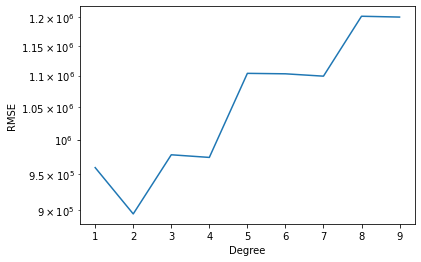

In [146]:
rmses = []
degrees = np.arange(1, 10)
min_rmse, min_degSA_C = 1e10, 0

x_train, x_test, y_train, y_test = train_test_split(new_df_SA_Crops_1, dfg_SA, test_size=0.15, random_state=0)

for deg in degrees:

    # Train features
    poly_features = PolynomialFeatures(degree=deg, include_bias=False)
    x_poly_train = poly_features.fit_transform(x_train)

    # Linear regression
    poly_reg = LinearRegression()
    poly_reg.fit(x_poly_train, y_train)

    # Compare with test data
    x_poly_test = poly_features.fit_transform(x_test)
    poly_predict = poly_reg.predict(x_poly_test)
    poly_mse = mean_squared_error(y_test, poly_predict)
    poly_rmse = np.sqrt(poly_mse)
    rmses.append(poly_rmse)
    
    # Cross-validation of degree
    if min_rmse > poly_rmse:
        min_rmse = poly_rmse
        min_degSA_C = deg

#ROOT MEAN SQUARE ERROR
print('Best degree {} with RMSE {}'.format(min_degSA_C, min_rmse))     

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(degrees, rmses)
ax.set_yscale('log')
ax.set_xlabel('Degree')
ax.set_ylabel('RMSE')

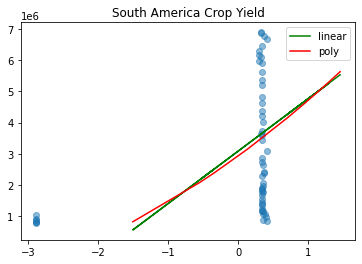

In [147]:
x_train, x_test, y_train, y_test = train_test_split(new_df_SA_Crops_1, dfg_SA, test_size=0.15, random_state=0)

poly_model = make_pipeline(PolynomialFeatures(degree=min_degSA_C), linear_model.LinearRegression())
poly_model.fit(x_train, y_train)

linear_model_1 = linear_model.LinearRegression()
linear_model_1.fit(x_train, y_train)

fig = plt.figure()
ax = plt.axes()

ax.scatter(new_df_NA_Crops_1,dfg_SA, alpha=0.5, cmap='viridis')
ax.plot(x_test, linear_model_1.predict(x_test), color='green', label='linear')
x_test.sort(axis=0)
ax.plot(x_test, poly_model.predict(x_test), color='red', label='poly')

plt.title('South America Crop Yield')
plt.xlabel('')
plt.ylabel('')
ax.legend()

# Europe  CROP YIELD LINEAR AND POLYNOMIAL REGRESSION

Best degree 2 with RMSE 259327.51293071703


Text(0, 0.5, 'RMSE')

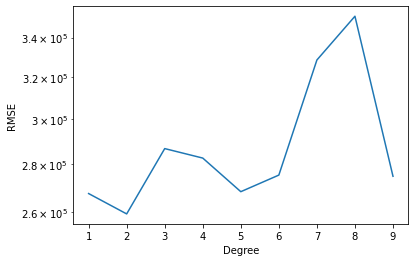

In [148]:
rmses = []
degrees = np.arange(1, 10)
min_rmse, min_degEU_C = 1e10, 0

x_train, x_test, y_train, y_test = train_test_split(new_df_EU_Crops_1, dfg_EU, test_size=0.15, random_state=0)

for deg in degrees:

    # Train features
    poly_features = PolynomialFeatures(degree=deg, include_bias=False)
    x_poly_train = poly_features.fit_transform(x_train)

    # Linear regression
    poly_reg = LinearRegression()
    poly_reg.fit(x_poly_train, y_train)

    # Compare with test data
    x_poly_test = poly_features.fit_transform(x_test)
    poly_predict = poly_reg.predict(x_poly_test)
    poly_mse = mean_squared_error(y_test, poly_predict)
    poly_rmse = np.sqrt(poly_mse)
    rmses.append(poly_rmse)
    
    # Cross-validation of degree
    if min_rmse > poly_rmse:
        min_rmse = poly_rmse
        min_degEU_C = deg

#ROOT MEAN SQUARE ERROR
print('Best degree {} with RMSE {}'.format(min_degEU_C, min_rmse))     

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(degrees, rmses)
ax.set_yscale('log')
ax.set_xlabel('Degree')
ax.set_ylabel('RMSE')

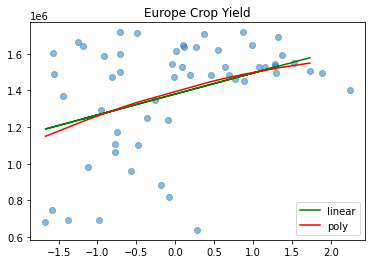

In [149]:
x_train, x_test, y_train, y_test = train_test_split(new_df_EU_Crops_1, dfg_EU, test_size=0.15, random_state=0)

poly_model = make_pipeline(PolynomialFeatures(degree=min_degEU_C), linear_model.LinearRegression())
poly_model.fit(x_train, y_train)

linear_model_1 = linear_model.LinearRegression()
linear_model_1.fit(x_train, y_train)

fig = plt.figure()
ax = plt.axes()

ax.scatter(new_df_EU_Crops_1,dfg_EU, alpha=0.5, cmap='viridis')
ax.plot(x_test, linear_model_1.predict(x_test), color='green', label='linear')
x_test.sort(axis=0)
ax.plot(x_test, poly_model.predict(x_test), color='red', label='poly')

plt.title('Europe Crop Yield')
plt.xlabel('')
plt.ylabel('')
ax.legend()

# OCEANIA  CROP YIELD LINEAR AND POLYNOMIAL REGRESSION

Best degree 9 with RMSE 254560.6582360177


Text(0, 0.5, 'RMSE')

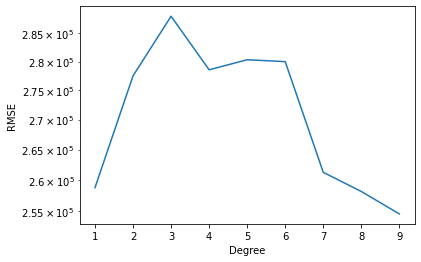

In [150]:
rmses = []
degrees = np.arange(1, 10)
min_rmse, min_degOC_C = 1e10, 0

x_train, x_test, y_train, y_test = train_test_split(new_df_OC_Crops_1, dfg_OC, test_size=0.15, random_state=0)

for deg in degrees:

    # Train features
    poly_features = PolynomialFeatures(degree=deg, include_bias=False)
    x_poly_train = poly_features.fit_transform(x_train)

    # Linear regression
    poly_reg = LinearRegression()
    poly_reg.fit(x_poly_train, y_train)

    # Compare with test data
    x_poly_test = poly_features.fit_transform(x_test)
    poly_predict = poly_reg.predict(x_poly_test)
    poly_mse = mean_squared_error(y_test, poly_predict)
    poly_rmse = np.sqrt(poly_mse)
    rmses.append(poly_rmse)
    
    # Cross-validation of degree
    if min_rmse > poly_rmse:
        min_rmse = poly_rmse
        min_degOC_C = deg

#ROOT MEAN SQUARE ERROR
print('Best degree {} with RMSE {}'.format(min_degOC_C, min_rmse))     

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(degrees, rmses)
ax.set_yscale('log')
ax.set_xlabel('Degree')
ax.set_ylabel('RMSE')

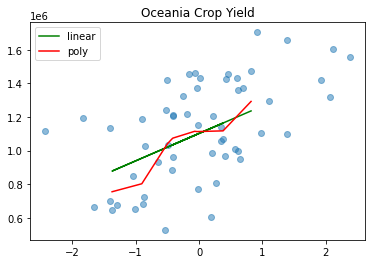

In [151]:
x_train, x_test, y_train, y_test = train_test_split(new_df_OC_Crops_1, dfg_OC, test_size=0.15, random_state=0)

poly_model = make_pipeline(PolynomialFeatures(degree=min_degOC_C), linear_model.LinearRegression())
poly_model.fit(x_train, y_train)

linear_model_1 = linear_model.LinearRegression()
linear_model_1.fit(x_train, y_train)

fig = plt.figure()
ax = plt.axes()

ax.scatter(new_df_OC_Crops_1,dfg_OC, alpha=0.5, cmap='viridis')
ax.plot(x_test, linear_model_1.predict(x_test), color='green', label='linear')
x_test.sort(axis=0)
ax.plot(x_test, poly_model.predict(x_test), color='red', label='poly')

plt.title('Oceania Crop Yield')
plt.xlabel('')
plt.ylabel('')
ax.legend()

# AFRICA CROP YIELD LINEAR AND POLYNOMIAL REGRESSION

Best degree 9 with RMSE 99877.43661090916


Text(0, 0.5, 'RMSE')

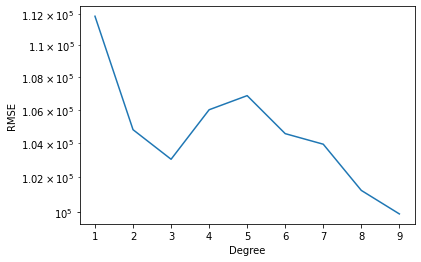

In [152]:
rmses = []
degrees = np.arange(1, 10)
min_rmse, min_degAF_C = 1e10, 0

x_train, x_test, y_train, y_test = train_test_split(new_df_AF_Crops_1, dfg_AF, test_size=0.15, random_state=0)

for deg in degrees:

    # Train features
    poly_features = PolynomialFeatures(degree=deg, include_bias=False)
    x_poly_train = poly_features.fit_transform(x_train)

    # Linear regression
    poly_reg = LinearRegression()
    poly_reg.fit(x_poly_train, y_train)

    # Compare with test data
    x_poly_test = poly_features.fit_transform(x_test)
    poly_predict = poly_reg.predict(x_poly_test)
    poly_mse = mean_squared_error(y_test, poly_predict)
    poly_rmse = np.sqrt(poly_mse)
    rmses.append(poly_rmse)
    
    # Cross-validation of degree
    if min_rmse > poly_rmse:
        min_rmse = poly_rmse
        min_degAF_C = deg

#ROOT MEAN SQUARE ERROR
print('Best degree {} with RMSE {}'.format(min_degAF_C, min_rmse))     

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(degrees, rmses)
ax.set_yscale('log')
ax.set_xlabel('Degree')
ax.set_ylabel('RMSE')

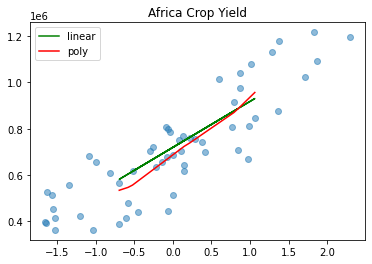

In [153]:
x_train, x_test, y_train, y_test = train_test_split(new_df_AF_Crops_1, dfg_AF, test_size=0.15, random_state=0)

poly_model = make_pipeline(PolynomialFeatures(degree=min_degAF_C), linear_model.LinearRegression())
poly_model.fit(x_train, y_train)

linear_model_1 = linear_model.LinearRegression()
linear_model_1.fit(x_train, y_train)

fig = plt.figure()
ax = plt.axes()

ax.scatter(new_df_AF_Crops_1,dfg_AF, alpha=0.5, cmap='viridis')
ax.plot(x_test, linear_model_1.predict(x_test), color='green', label='linear')
x_test.sort(axis=0)
ax.plot(x_test, poly_model.predict(x_test), color='red', label='poly')

plt.title('Africa Crop Yield')
plt.xlabel('')
plt.ylabel('')
ax.legend()

# ASIA CR

Best degree 2 with RMSE 6800102.010967108


Text(0, 0.5, 'RMSE')

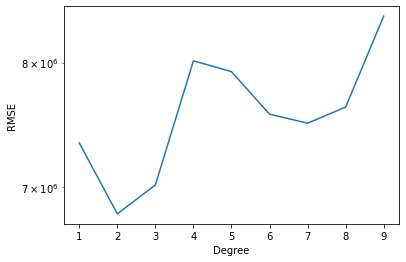

In [172]:
rmses = []
degrees = np.arange(1, 10)
min_rmse, min_degAS_C = 1e10, 0

x_train, x_test, y_train, y_test = train_test_split(new_df_AS_Crops_1, dfg_AS, test_size=0.15, random_state=0)

for deg in degrees:

    # Train features
    poly_features = PolynomialFeatures(degree=deg, include_bias=False)
    x_poly_train = poly_features.fit_transform(x_train)

    # Linear regression
    poly_reg = LinearRegression()
    poly_reg.fit(x_poly_train, y_train)

    # Compare with test data
    x_poly_test = poly_features.fit_transform(x_test)
    poly_predict = poly_reg.predict(x_poly_test)
    poly_mse = mean_squared_error(y_test, poly_predict)
    poly_rmse = np.sqrt(poly_mse)
    rmses.append(poly_rmse)
    
    # Cross-validation of degree
    if min_rmse > poly_rmse:
        min_rmse = poly_rmse
        min_degAS_C = deg

#ROOT MEAN SQUARE ERROR
print('Best degree {} with RMSE {}'.format(min_degAS_C, min_rmse))     

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(degrees, rmses)
ax.set_yscale('log')
ax.set_xlabel('Degree')
ax.set_ylabel('RMSE')

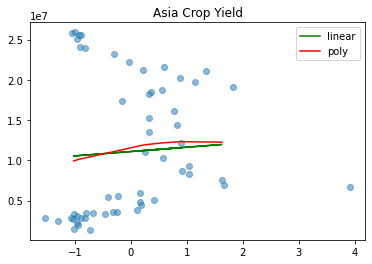

In [155]:
x_train, x_test, y_train, y_test = train_test_split(new_df_AS_Crops_1, dfg_AS, test_size=0.15, random_state=0)

poly_model = make_pipeline(PolynomialFeatures(degree=min_degAS_C), linear_model.LinearRegression())
poly_model.fit(x_train, y_train)

linear_model_1 = linear_model.LinearRegression()
linear_model_1.fit(x_train, y_train)

fig = plt.figure()
ax = plt.axes()

ax.scatter(new_df_AS_Crops_1,dfg_AS, alpha=0.5, cmap='viridis')
ax.plot(x_test, linear_model_1.predict(x_test), color='green', label='linear')
x_test.sort(axis=0)
ax.plot(x_test, poly_model.predict(x_test), color='red', label='poly')

plt.title('Asia Crop Yield')
plt.xlabel('')
plt.ylabel('')
ax.legend()

# As we can see, the mean squared error is very high due to the data we have recollected from the livestock production. To fix this, we will be scaling down the data to get more accurate results.

In [156]:
######################## North America ###################################




In [157]:
######################## ASIA ###################################

In [158]:
######################## AFRICA ###################################

In [159]:
######################## OCEANIA ###################################

# Calculating the projections livestock...

In [160]:
df_projections = pd.read_csv('tas_2020_2039_mavg_rcp26_AUS_BRA_CAN_CHL_CHN_COL_ETH_IND_ITA_NLD_NZL_NGA_ROU_ZAF_SYR_USA.csv')
df_projections = df_projections.dropna() #cleaning the data


new_df_projections = df_projections.rename(columns={' Country': 'Country'})
# new_df_projections['Country'].unique()


In [161]:
#Extracting data from North America (United states and Canada)

NorthAmerica_Projection = new_df_projections[ (new_df_projections['Country'] == ' United States') | (new_df_projections['Country'] == ' Canada') ]
NorthAmerica_Projection = NorthAmerica_Projection.groupby(' Statistics').mean()
# NorthAmerica_Projection = NorthAmerica_Projection['Monthly Temperature - (Celsius)']
NorthAmerica_Projection

Monthly Temperature - (Celsius)
 Statistics                                  
 Apr Average                         1.092134
 Aug Average                        13.934392
 Dec Average                        -7.293763
 Feb Average                        -8.413175
 Jan Average                        -9.294649
 Jul Average                        15.227344
 Jun Average                        12.618142
 Mar Average                        -4.656187
 May Average                         7.375717
 Nov Average                        -2.405591
 Oct Average                         3.755216
 Sep Average                         9.579375

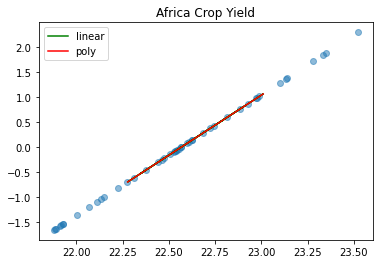

In [162]:
x_train, x_test, y_train, y_test = train_test_split(new_df_AF, new_df_AF_Crops_1, test_size=0.15, random_state=0)

poly_model = make_pipeline(PolynomialFeatures(degree=min_degAF_C), linear_model.LinearRegression())
poly_model.fit(x_train, y_train)

linear_model_1 = linear_model.LinearRegression()
linear_model_1.fit(x_train, y_train)

fig = plt.figure()
ax = plt.axes()

ax.scatter(x_train,y_train, alpha=0.5, cmap='viridis')
ax.plot(x_test, linear_model_1.predict(x_test), color='green', label='linear')
x_test.sort(axis=0)
ax.plot(x_test, poly_model.predict(x_test), color='red', label='poly')

plt.title('Africa Crop Yield')
plt.xlabel('')
plt.ylabel('')
ax.legend()

In [163]:
#Extracting Data from South America (Brazil, Colombia, Chile)
SouthAmerica_Projection = new_df_projections[ (new_df_projections['Country'] == ' Brazil') | (new_df_projections['Country'] == ' Chile') |(new_df_projections['Country'] == ' Colombia')  ]
SouthAmerica_Projection


Monthly Temperature - (Celsius)        Year                        Model    Statistics    Country  ISO3
192                         26.861425   2020-2039                   bcc_csm1_1   Jan Average     Brazil   BRA
193                         26.983355   2020-2039                   bcc_csm1_1   Feb Average     Brazil   BRA
194                         26.678915   2020-2039                   bcc_csm1_1   Mar Average     Brazil   BRA
195                         26.141119   2020-2039                   bcc_csm1_1   Apr Average     Brazil   BRA
196                         25.462734   2020-2039                   bcc_csm1_1   May Average     Brazil   BRA
...                               ...         ...                          ...           ...        ...   ...
3091                         1.740022   2020-2039   Ensemble (90th Percentile)   Aug Average   Colombia   COL
3092                         1.652147   2020-2039   Ensemble (90th Percentile)   Sep Average   Colombia   COL
3093                         1.862160   2020-2039   Ensemble (90th Percentile)   Oct Average   Colombia   COL
3094                         1.947045   2020-2039   Ensemble (90th Percentile)   Nov Average   Colombia   COL
3095                         1.583142   2020-2039   Ensemble (90th Percentile)   Dec Average   Colombia   COL

[684 rows x 6 columns]

In [164]:
#Extracting data from Asia (China, India, Syria)
Asia_Projection = new_df_projections[ (new_df_projections['Country'] == ' China') | (new_df_projections['Country'] == ' India') |(new_df_projections['Country'] == ' Syria')  ]
Asia_Projection

Monthly Temperature - (Celsius)        Year                        Model    Statistics Country  ISO3
768                         -8.268048   2020-2039                   bcc_csm1_1   Jan Average   China   CHN
769                         -5.154873   2020-2039                   bcc_csm1_1   Feb Average   China   CHN
770                          0.680895   2020-2039                   bcc_csm1_1   Mar Average   China   CHN
771                          7.274466   2020-2039                   bcc_csm1_1   Apr Average   China   CHN
772                         12.476327   2020-2039                   bcc_csm1_1   May Average   China   CHN
...                               ...         ...                          ...           ...     ...   ...
3379                         2.754962   2020-2039   Ensemble (90th Percentile)   Aug Average   Syria   SYR
3380                         2.356451   2020-2039   Ensemble (90th Percentile)   Sep Average   Syria   SYR
3381                         1.842484   2020-2039   Ensemble (90th Percentile)   Oct Average   Syria   SYR
3382                         1.602102   2020-2039   Ensemble (90th Percentile)   Nov Average   Syria   SYR
3383                         1.746933   2020-2039   Ensemble (90th Percentile)   Dec Average   Syria   SYR

[684 rows x 6 columns]

In [165]:
#Extracting data from Africa (Ethiopia, Nigeria , South Africa)
Africa_Projection = new_df_projections[ (new_df_projections['Country'] == ' Ethiopia') | (new_df_projections['Country'] == ' Nigeria') |(new_df_projections['Country'] == ' South Africa')  ]
Africa_Projection = Africa_Projection.groupby(' Statistics').mean()
Africa_Projection


Africa_Projection = Africa_Projection.to_numpy()


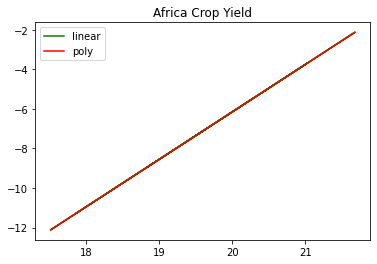

In [166]:


poly_model = make_pipeline(PolynomialFeatures(degree=3), linear_model.LinearRegression())
poly_model.fit(new_df_AF, new_df_AF_Crops_1)

linear_model_1 = linear_model.LinearRegression()
linear_model_1.fit(new_df_AF, new_df_AF_Crops_1)

fig = plt.figure()
ax = plt.axes()

#ax.scatter(Africa_Projection,new_df_AF_Crops_1, alpha=0.5, cmap='viridis')
ax.plot(Africa_Projection, linear_model_1.predict(Africa_Projection), color='green', label='linear')
Africa_Projection.sort(axis=0)
ax.plot(Africa_Projection, poly_model.predict(Africa_Projection), color='red', label='poly')
#Africa_Projection.sort(axis=0)
plt.title('Africa Crop Yield')
plt.xlabel('')
plt.ylabel('')
ax.legend()

In [167]:
#Extracting data from Europe 
Europe_Projection = new_df_projections[ (new_df_projections['Country'] == ' Netherlands') | (new_df_projections['Country'] == ' Italy') |(new_df_projections['Country'] == ' Romania')  ]
Europe_Projection

Monthly Temperature - (Celsius)        Year                        Model    Statistics       Country  ISO3
1536                         8.949074   2020-2039                   bcc_csm1_1   Jan Average         Italy   ITA
1537                         8.714986   2020-2039                   bcc_csm1_1   Feb Average         Italy   ITA
1538                         9.975708   2020-2039                   bcc_csm1_1   Mar Average         Italy   ITA
1539                        11.850256   2020-2039                   bcc_csm1_1   Apr Average         Italy   ITA
1540                        14.609899   2020-2039                   bcc_csm1_1   May Average         Italy   ITA
1541                        20.278149   2020-2039                   bcc_csm1_1   Jun Average         Italy   ITA
1542                        23.636673   2020-2039                   bcc_csm1_1   Jul Average         Italy   ITA
1543                        23.546095   2020-2039                   bcc_csm1_1   Aug Average         Italy   ITA
1544                        20.239998   2020-2039                   bcc_csm1_1   Sep Average         Italy   ITA
1545                        16.305393   2020-2039                   bcc_csm1_1   Oct Average         Italy   ITA
1546                        12.832515   2020-2039                   bcc_csm1_1   Nov Average         Italy   ITA
1547                        10.487074   2020-2039                   bcc_csm1_1   Dec Average         Italy   ITA
1548                         9.230974   2020-2039                 bcc_csm1_1_m   Jan Average         Italy   ITA
1549                         9.062693   2020-2039                 bcc_csm1_1_m   Feb Average         Italy   ITA
1550                        10.705992   2020-2039                 bcc_csm1_1_m   Mar Average         Italy   ITA
1551                        13.264133   2020-2039                 bcc_csm1_1_m   Apr Average         Italy   ITA
1552                        17.010899   2020-2039                 bcc_csm1_1_m   May Average         Italy   ITA
1553                        21.927746   2020-2039                 bcc_csm1_1_m   Jun Average         Italy   ITA
1554                        24.533243   2020-2039                 bcc_csm1_1_m   Jul Average         Italy   ITA
1555                        24.791890   2020-2039                 bcc_csm1_1_m   Aug Average         Italy   ITA
1556                        20.994791   2020-2039                 bcc_csm1_1_m   Sep Average         Italy   ITA
1557                        16.537754   2020-2039                 bcc_csm1_1_m   Oct Average         Italy   ITA
1558                        12.605242   2020-2039                 bcc_csm1_1_m   Nov Average         Italy   ITA
1559                        10.621689   2020-2039                 bcc_csm1_1_m   Dec Average         Italy   ITA
1560                         8.916792   2020-2039                        ccsm4   Jan Average         Italy   ITA
1561                         9.508979   2020-2039                        ccsm4   Feb Average         Italy   ITA
1562                        10.559653   2020-2039                        ccsm4   Mar Average         Italy   ITA
1563                        13.389144   2020-2039                        ccsm4   Apr Average         Italy   ITA
1564                        17.036615   2020-2039                        ccsm4   May Average         Italy   ITA
1565                        21.575989   2020-2039                        ccsm4   Jun Average         Italy   ITA
1566                        25.140617   2020-2039                        ccsm4   Jul Average         Italy   ITA
1567                        25.287950   2020-2039                        ccsm4   Aug Average         Italy   ITA
1568                        21.387590   2020-2039                        ccsm4   Sep Average         Italy   ITA
1569                        16.683167   2020-2039                        ccsm4   Oct Average         Italy   ITA
1570                        13.389482   2020-2039  

In [ ]:
#Extracting data from Oceania (Australia, New Zealand)
Oceania_Projection = new_df_projections[ (new_df_projections['Country'] == ' Australia') | (new_df_projections['Country'] == ' New Zealand')]
Oceania_Projection

# Calculating the linear regression with this new data

In [ ]:
#North America
#North America

NorthAmerica_Projection = NorthAmerica_Projection.to_numpy()
# NorthAmerica_Projection = NorthAmerica_Projection[:,np.newaxis]
# dfg_NA = dfg_NA.to_numpy()


model.fit(new_df_NA,dfg_NA)
NA_pred = model.predict(NorthAmerica_Projection)

# print(new_df_NA_1[:3])
# print("----->" ,new_df_NA[:3])

# print(mean_squared_error(NA_y_test, NA_pred))
# print(mean_squared_error.confusion_matrix(NA_y_test, NA_pred))

plt.scatter(NorthAmerica_Projection, NA_pred,  color='red')
plt.plot(NorthAmerica_Projection, NA_pred, color='blue', linewidth=2)

plt.xticks()
plt.yticks()

plt.show()


In [ ]:
NA_pred


# Calculating the projections crops...

# Temperature data world wide

In [ ]:
# Changed the format of dt to datetime format "Year , month, day"
# Created a new column 'year'
# Dropped all NaN values
df_temp['dt'] = pd.to_datetime(df_temp['dt'], format = '%Y-%m-%d')

df_temp['year'] = df_temp['dt'].dt.year

df_temp.dropna()


# This graph shows the variation of temperature from 1961 to 2015
# The average land temperature has increased from 1961 to 2015

In [ ]:
df2 = df_temp[df_temp.year >= 1961]
df3 = df2.groupby('year')['LandAverageTemperature'].mean()
df3.plot(xlabel = 'Year', ylabel = 'Land Average Temp (Celcius)',x= 'year', y = 'LandAverageTemperature', kind = 'line',color = 'red')
plt.title('Average land temperature')
plt.show()

# This graph shows that the land minimum temperature has also been going up


In [ ]:
dfz = df_temp[df_temp.year >= 1961]
df4 = dfz.groupby('year')['LandMinTemperature'].mean()
df4.plot(xlabel = 'Year', ylabel = 'Land Min Temp (Celcius)',x= 'year', y = 'LandMinTemperature', kind = 'line',color = 'blue')
plt.title('Land Minimum Temperature')
plt.show()

In [ ]:
#sns.distplot(df3)

In [ ]:
df = df_crops[(df_crops.Element == 'Area harvested') & (df_crops.Area == 'World')]

dfg = df.groupby('Year Code')['Value'].mean()
dfg.plot(xlabel = 'Year', ylabel = 'ha',x= 'Year Code', y = 'Value', kind = 'line',color = 'purple')
plt.title('Crops Area harvested')
plt.show()

In [ ]:
df2 = df_crops[(df_crops.Element == 'Production') & (df_crops.Area == 'World')]

dfg = df2.groupby('Year Code')['Value'].mean()
dfg.plot(xlabel = 'Year', ylabel = 'Tonnes',x= 'Year Code', y = 'Value', kind = 'line',color = 'purple')
plt.title('Crops Production')
plt.show()

In [ ]:
df_livestock

In [ ]:
df2 = df_livestock[(df_livestock.Element == 'Production') & (df_livestock.Area == 'World')]

dfg = df2.groupby('Year Code')['Value'].mean()
dfg.plot(xlabel = 'Year', ylabel = 'Tonnes',x= 'Year Code', y = 'Value', kind = 'line')
plt.title('Livestock Production')
plt.show()


In [ ]:
df2 = df_livestock[(df_livestock.Element == 'Yield') & (df_livestock.Area == 'World')]

dfg = df2.groupby('Year Code')['Value'].mean()
dfg.plot(xlabel = 'Year', ylabel = '100mg/An',x= 'Year Code', y = 'Value', kind = 'line')
plt.title('Livestock Yield')
plt.show()